In [1]:
import torch
import torch.nn as nn
import torchvision.models as models
from torchvision import transforms, datasets
from torch.utils.data import DataLoader

# Merged Dataset

In [2]:
import os
import shutil

# Direktori input read-only
source_dir = '/kaggle/input/bisindo-primer-sekunder-v2/Bisindo - Data Primer + Sekunder V2'

# Direktori tujuan (working directory) untuk salinan dataset
target_dir = '/kaggle/working/dataset_bisindo_copy'

# Salin seluruh isi folder source_dir ke target_dir
if not os.path.exists(target_dir):
    shutil.copytree(source_dir, target_dir)

print("Dataset berhasil disalin ke:", target_dir)

Dataset berhasil disalin ke: /kaggle/working/dataset_bisindo_copy


In [3]:
from sklearn.model_selection import train_test_split

# Direktori dataset kedua yang belum terbagi
dataset2_dir = '/kaggle/working/dataset_bisindo_copy'  # Struktur: dataset2/class_name/image.jpg

# Direktori target dataset pertama yang sudah dibagi
train_dir = '/kaggle/working/split_data/datatrain'
test_dir = '/kaggle/working/split_data/datatest'

# Mendapatkan semua folder kelas dari dataset kedua
classes = os.listdir(dataset2_dir)

# Tentukan proporsi train-test split
test_size = 0.2  # Misal, 20% untuk test

# Loop untuk setiap kelas
for class_name in classes:
    class_dir = os.path.join(dataset2_dir, class_name)
    
    # Daftar semua file gambar dalam folder kelas
    images = [os.path.join(class_dir, img) for img in os.listdir(class_dir)]
    
    # Split gambar menjadi train dan test
    train_images, test_images = train_test_split(images, test_size=test_size, random_state=42)
    
    # Pastikan direktori kelas di folder train dan test ada
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)
    
    # Pindahkan gambar train ke folder train yang sesuai
    for img in train_images:
        shutil.move(img, os.path.join(train_dir, class_name))
    
    # Pindahkan gambar test ke folder test yang sesuai
    for img in test_images:
        shutil.move(img, os.path.join(test_dir, class_name))

In [4]:
# Menghitung jumlah gambar di setiap folder kelas
for class_name in classes:
    train_class_dir = os.path.join(train_dir, class_name)
    test_class_dir = os.path.join(test_dir, class_name)
    
    num_train_images = len(os.listdir(train_class_dir))
    num_test_images = len(os.listdir(test_class_dir))
    
    print(f'Kelas {class_name}: {num_train_images} gambar di train, {num_test_images} gambar di test')

Kelas I: 80 gambar di train, 20 gambar di test
Kelas R: 80 gambar di train, 20 gambar di test
Kelas S: 80 gambar di train, 20 gambar di test
Kelas A: 80 gambar di train, 20 gambar di test
Kelas P: 80 gambar di train, 20 gambar di test
Kelas W: 80 gambar di train, 20 gambar di test
Kelas K: 80 gambar di train, 20 gambar di test
Kelas E: 80 gambar di train, 20 gambar di test
Kelas O: 80 gambar di train, 20 gambar di test
Kelas F: 80 gambar di train, 20 gambar di test
Kelas J: 80 gambar di train, 20 gambar di test
Kelas N: 80 gambar di train, 20 gambar di test
Kelas Z: 80 gambar di train, 20 gambar di test
Kelas B: 80 gambar di train, 20 gambar di test
Kelas V: 80 gambar di train, 20 gambar di test
Kelas U: 80 gambar di train, 20 gambar di test
Kelas C: 80 gambar di train, 20 gambar di test
Kelas Q: 80 gambar di train, 20 gambar di test
Kelas M: 80 gambar di train, 20 gambar di test
Kelas D: 80 gambar di train, 20 gambar di test
Kelas X: 80 gambar di train, 20 gambar di test
Kelas L: 80 g

# Transform Data

In [5]:
# Write transform for image
data_transform = transforms.Compose([
    # Resize the images to 64x64
    transforms.Resize(size=(224, 224)),
    # Turn the image into a torch.Tensor
    transforms.ToTensor(), # this also converts all pixel values from 0 to 255 to be between 0.0 and 1.0
    transforms.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
])

aug_transform = transforms.Compose([
    # Resize the images to 64x64
    transforms.Resize(size=(224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
#     transforms.RandomRotation(degrees=20),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.GaussianBlur(kernel_size=(5, 5), sigma=(0.1, 2.0)),
    # Turn the image into a torch.Tensor
    transforms.ToTensor(), # this also converts all pixel values from 0 to 255 to be between 0.0 and 1.0
    transforms.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
])

In [6]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir, # target folder of images
                                  transform=aug_transform, # transforms to perform on data (images)
                                  target_transform=None) # transforms to perform on labels (if necessary)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 2080
    Root location: /kaggle/working/split_data/datatrain
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ColorJitter(brightness=(0.8, 1.2), contrast=(0.8, 1.2), saturation=(0.8, 1.2), hue=(-0.2, 0.2))
               GaussianBlur(kernel_size=(5, 5), sigma=(0.1, 2.0))
               ToTensor()
               Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 520
    Root location: /kaggle/working/split_data/datatest
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
           )


In [7]:
# Can also get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25}

In [8]:
# Setup batch size and number of workers
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

# Turn train and test Datasets into DataLoaders
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE, # how many samples per batch?
                              num_workers=NUM_WORKERS, # how many subprocesses to use for data loading? (higher = more)
                              shuffle=True) # shuffle the data?

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=NUM_WORKERS,
                             shuffle=False) # don't usually need to shuffle testing data

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x79c4c8cf9630>,
 <torch.utils.data.dataloader.DataLoader at 0x79c4c8cfb940>)

# EfficientNet

## Build dan Training Model (EfficientNet)

In [9]:
# Setup model EfficientNetV2_M yang telah di-pretrained
effNet_model = models.efficientnet_v2_s(weights='DEFAULT')

# Membekukan semua layer kecuali classifier
for param in effNet_model.parameters():
    param.requires_grad = False
        
effNet_model.classifier = nn.Sequential(
    nn.Dropout(p=0.3),  # Dropout dengan probabilitas 30%
    nn.Linear(effNet_model.classifier[1].in_features, 26)  # Layer fully connected baru
)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
effNet_model = effNet_model.to(device)

Downloading: "https://download.pytorch.org/models/efficientnet_v2_s-dd5fe13b.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_v2_s-dd5fe13b.pth
100%|██████████| 82.7M/82.7M [00:00<00:00, 177MB/s] 


In [10]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(effNet_model.classifier.parameters(), lr=0.001, weight_decay=1e-4)

In [11]:
import time

train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

num_epochs = 25

overall_start_time = time.time()  # Catat waktu mulai keseluruhan
for epoch in range(num_epochs):
    epoch_start_time = time.time()  # Catat waktu awal epoch
    
    effNet_model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_dataloader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = effNet_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct_train += (preds == labels).sum().item()
        total_train += labels.size(0)

    train_losses.append(running_loss/len(train_dataloader))
    train_accuracies.append(correct_train/total_train)

    # Evaluate on test set
    effNet_model.eval()
    running_loss = 0.0
    correct_test = 0
    total_test = 0

    with torch.no_grad():
        for inputs, labels in test_dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = effNet_model(inputs)
            loss = criterion(outputs, labels)

            running_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct_test += (preds == labels).sum().item()
            total_test += labels.size(0)

    test_losses.append(running_loss/len(test_dataloader))
    test_accuracies.append(correct_test/total_test)
    
    epoch_end_time = time.time()  # Catat waktu akhir epoch
    epoch_time = epoch_end_time - epoch_start_time  # Hitung waktu untuk epoch ini

    print(f'Epoch [{epoch + 1}/{num_epochs}] - Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accuracies[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}, Test Accuracy: {test_accuracies[-1]:.4f}, Time: {epoch_time:.2f} seconds')

overall_end_time = time.time()  # Catat waktu akhir keseluruhan
total_training_time = overall_end_time - overall_start_time  # Hitung total waktu training
print(f'Total training time: {total_training_time:.2f} seconds')

Epoch [1/25] - Train Loss: 2.9293, Train Accuracy: 0.2457, Test Loss: 2.5766, Test Accuracy: 0.5288, Time: 35.73 seconds
Epoch [2/25] - Train Loss: 2.2751, Train Accuracy: 0.5351, Test Loss: 2.1230, Test Accuracy: 0.6365, Time: 35.04 seconds
Epoch [3/25] - Train Loss: 1.8821, Train Accuracy: 0.6221, Test Loss: 1.7725, Test Accuracy: 0.6865, Time: 35.92 seconds
Epoch [4/25] - Train Loss: 1.6055, Train Accuracy: 0.6861, Test Loss: 1.5871, Test Accuracy: 0.6981, Time: 34.67 seconds
Epoch [5/25] - Train Loss: 1.4321, Train Accuracy: 0.7139, Test Loss: 1.4289, Test Accuracy: 0.7154, Time: 34.70 seconds
Epoch [6/25] - Train Loss: 1.2928, Train Accuracy: 0.7351, Test Loss: 1.2938, Test Accuracy: 0.7385, Time: 35.39 seconds
Epoch [7/25] - Train Loss: 1.2023, Train Accuracy: 0.7375, Test Loss: 1.1990, Test Accuracy: 0.7481, Time: 35.21 seconds
Epoch [8/25] - Train Loss: 1.1172, Train Accuracy: 0.7562, Test Loss: 1.1273, Test Accuracy: 0.7519, Time: 35.91 seconds
Epoch [9/25] - Train Loss: 1.033

## Arsitektur (EfficientNet)

In [12]:
from torchinfo import summary

summary(model=effNet_model,
       input_size=(BATCH_SIZE, 3, 224, 224),
       col_names=["input_size", "output_size", "num_params", "trainable"],
       col_width=20,
       )

Layer (type:depth-idx)                                  Input Shape          Output Shape         Param #              Trainable
EfficientNet                                            [32, 3, 224, 224]    [32, 26]             --                   Partial
├─Sequential: 1-1                                       [32, 3, 224, 224]    [32, 1280, 7, 7]     --                   False
│    └─Conv2dNormActivation: 2-1                        [32, 3, 224, 224]    [32, 24, 112, 112]   --                   False
│    │    └─Conv2d: 3-1                                 [32, 3, 224, 224]    [32, 24, 112, 112]   (648)                False
│    │    └─BatchNorm2d: 3-2                            [32, 24, 112, 112]   [32, 24, 112, 112]   (48)                 False
│    │    └─SiLU: 3-3                                   [32, 24, 112, 112]   [32, 24, 112, 112]   --                   --
│    └─Sequential: 2-2                                  [32, 24, 112, 112]   [32, 24, 112, 112]   --                   Fal

In [13]:
print(effNet_model)

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): FusedMBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
        )
        (stochastic_depth): StochasticDepth(p=0.0, mode=row)
      )
      (1): FusedMBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  

In [14]:
torch.save(effNet_model, "effNet_model.pth")

## Evaluasi (EfficientNet)

### Akurasi

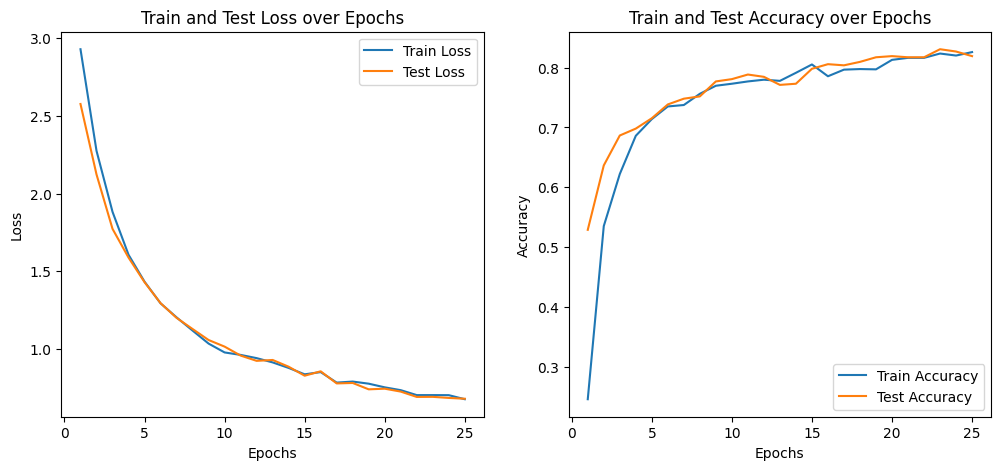

In [15]:
import matplotlib.pyplot as plt

# Plot loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Test Loss over Epochs')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, num_epochs+1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy over Epochs')
plt.legend()

plt.show()

### Confusion Matrix

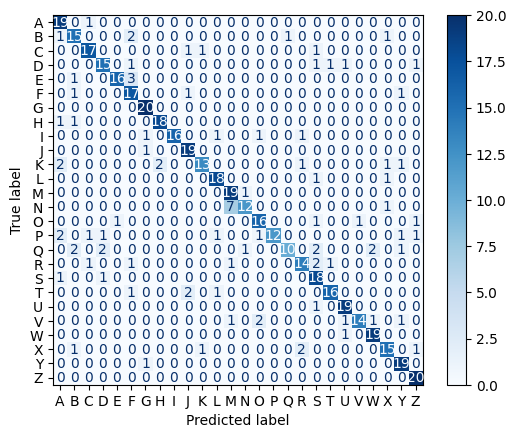

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve

effNet_model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for inputs, labels in test_dataloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = effNet_model(inputs)
        _, preds = torch.max(outputs, 1)
        y_true.extend(labels.cpu().tolist())
        y_pred.extend(preds.cpu().tolist())

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_dict)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [17]:
from sklearn.metrics import precision_score, recall_score, f1_score

def calculate_metrics_per_label(model, data_loader, device):
    model.eval()  # Set model ke mode evaluasi
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)  # Forward pass
            _, preds = torch.max(outputs, 1)  # Mendapatkan prediksi kelas
            
            all_preds.extend(preds.cpu().tolist())
            all_labels.extend(labels.cpu().tolist())
    
    # Menghitung Precision, Recall, F1-score untuk setiap label
    precision = precision_score(all_labels, all_preds, average=None)
    recall = recall_score(all_labels, all_preds, average=None)
    f1 = f1_score(all_labels, all_preds, average=None)
    
    return precision, recall, f1


In [18]:
# Asumsikan kamu sudah melatih model dan memiliki test_loader
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
effNet_model.to(device)

# Menghitung metrik
precision, recall, f1 = calculate_metrics_per_label(effNet_model, test_dataloader, device)

# Tampilkan metrik untuk setiap label dengan nama kelas
for i, label in enumerate(class_dict):
    print(f"{label}:")
    print(f"  Precision: {precision[i]:.4f}")
    print(f"  Recall:    {recall[i]:.4f}")
    print(f"  F1-score:  {f1[i]:.4f}")


A:
  Precision: 0.7308
  Recall:    0.9500
  F1-score:  0.8261
B:
  Precision: 0.7143
  Recall:    0.7500
  F1-score:  0.7317
C:
  Precision: 0.8500
  Recall:    0.8500
  F1-score:  0.8500
D:
  Precision: 0.7895
  Recall:    0.7500
  F1-score:  0.7692
E:
  Precision: 0.9412
  Recall:    0.8000
  F1-score:  0.8649
F:
  Precision: 0.6800
  Recall:    0.8500
  F1-score:  0.7556
G:
  Precision: 0.8696
  Recall:    1.0000
  F1-score:  0.9302
H:
  Precision: 0.9000
  Recall:    0.9000
  F1-score:  0.9000
I:
  Precision: 1.0000
  Recall:    0.8000
  F1-score:  0.8889
J:
  Precision: 0.8261
  Recall:    0.9500
  F1-score:  0.8837
K:
  Precision: 0.8667
  Recall:    0.6500
  F1-score:  0.7429
L:
  Precision: 0.8571
  Recall:    0.9000
  F1-score:  0.8780
M:
  Precision: 0.6786
  Recall:    0.9500
  F1-score:  0.7917
N:
  Precision: 0.8571
  Recall:    0.6000
  F1-score:  0.7059
O:
  Precision: 0.8000
  Recall:    0.8000
  F1-score:  0.8000
P:
  Precision: 1.0000
  Recall:    0.6000
  F1-score: 

# ResNet-50

## Build dan Training Model (ResNet)

In [19]:
# Setup model ResNet50 yang telah di-pretrained
resnet_model = models.resnet50(weights='DEFAULT')

# # Membekukan semua layer hingga layer tertentu (misalnya layer3)
# for name, param in resnet_model.named_parameters():
#     if name.startswith("layer1") or name.startswith("layer2") or name.startswith("layer3"):
#         param.requires_grad = False

# Freeze semua parameter di semua layer kecuali layer terakhir
for param in resnet_model.parameters():
    param.requires_grad = False

num_ftrs = resnet_model.fc.in_features
# resnet_model.fc = nn.Linear(num_ftrs, len(class_dict))

resnet_model.fc = nn.Sequential(
    nn.Dropout(p=0.3),  # Add dropout layer with 50% probability
#     nn.ReLU(),
#     nn.Linear(512, len(class_dict))
    nn.Linear(num_ftrs, len(class_dict))
)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
resnet_model = resnet_model.to(device)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 96.8MB/s]


In [20]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(resnet_model.fc.parameters(), lr=0.001, weight_decay=1e-4)

In [21]:
import time

train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

num_epochs = 25

overall_start_time = time.time()  # Catat waktu mulai keseluruhan
for epoch in range(num_epochs):
    epoch_start_time = time.time()  # Catat waktu awal epoch
    
    resnet_model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_dataloader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = resnet_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct_train += (preds == labels).sum().item()
        total_train += labels.size(0)

    train_losses.append(running_loss/len(train_dataloader))
    train_accuracies.append(correct_train/total_train)

    # Evaluate on test set
    resnet_model.eval()
    running_loss = 0.0
    correct_test = 0
    total_test = 0

    with torch.no_grad():
        for inputs, labels in test_dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = resnet_model(inputs)
            loss = criterion(outputs, labels)

            running_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct_test += (preds == labels).sum().item()
            total_test += labels.size(0)

    test_losses.append(running_loss/len(test_dataloader))
    test_accuracies.append(correct_test/total_test)
    
    epoch_end_time = time.time()  # Catat waktu akhir epoch
    epoch_time = epoch_end_time - epoch_start_time  # Hitung waktu untuk epoch ini

    print(f'Epoch [{epoch + 1}/{num_epochs}] - Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accuracies[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}, Test Accuracy: {test_accuracies[-1]:.4f}, Time: {epoch_time:.2f} seconds')

overall_end_time = time.time()  # Catat waktu akhir keseluruhan
total_training_time = overall_end_time - overall_start_time  # Hitung total waktu training
print(f'Total training time: {total_training_time:.2f} seconds')

Epoch [1/25] - Train Loss: 3.0076, Train Accuracy: 0.2505, Test Loss: 2.6988, Test Accuracy: 0.5712, Time: 34.07 seconds
Epoch [2/25] - Train Loss: 2.4434, Train Accuracy: 0.5841, Test Loss: 2.2805, Test Accuracy: 0.6385, Time: 34.10 seconds
Epoch [3/25] - Train Loss: 2.0522, Train Accuracy: 0.6774, Test Loss: 1.9618, Test Accuracy: 0.7135, Time: 34.20 seconds
Epoch [4/25] - Train Loss: 1.7447, Train Accuracy: 0.7442, Test Loss: 1.7105, Test Accuracy: 0.7365, Time: 34.27 seconds
Epoch [5/25] - Train Loss: 1.5394, Train Accuracy: 0.7822, Test Loss: 1.5172, Test Accuracy: 0.7635, Time: 34.29 seconds
Epoch [6/25] - Train Loss: 1.3515, Train Accuracy: 0.8115, Test Loss: 1.3681, Test Accuracy: 0.7846, Time: 34.24 seconds
Epoch [7/25] - Train Loss: 1.2233, Train Accuracy: 0.8274, Test Loss: 1.2534, Test Accuracy: 0.7942, Time: 34.83 seconds
Epoch [8/25] - Train Loss: 1.1273, Train Accuracy: 0.8332, Test Loss: 1.1407, Test Accuracy: 0.8154, Time: 33.88 seconds
Epoch [9/25] - Train Loss: 1.046

In [22]:
from torchinfo import summary

summary(model=resnet_model,
       input_size=(BATCH_SIZE, 3, 224, 224),
       col_names=["input_size", "output_size", "num_params", "trainable"],
       col_width=20,
       )
# summary(resnet_model, input_size=(3, 224, 224))

Layer (type:depth-idx)                   Input Shape          Output Shape         Param #              Trainable
ResNet                                   [32, 3, 224, 224]    [32, 26]             --                   Partial
├─Conv2d: 1-1                            [32, 3, 224, 224]    [32, 64, 112, 112]   (9,408)              False
├─BatchNorm2d: 1-2                       [32, 64, 112, 112]   [32, 64, 112, 112]   (128)                False
├─ReLU: 1-3                              [32, 64, 112, 112]   [32, 64, 112, 112]   --                   --
├─MaxPool2d: 1-4                         [32, 64, 112, 112]   [32, 64, 56, 56]     --                   --
├─Sequential: 1-5                        [32, 64, 56, 56]     [32, 256, 56, 56]    --                   False
│    └─Bottleneck: 2-1                   [32, 64, 56, 56]     [32, 256, 56, 56]    --                   False
│    │    └─Conv2d: 3-1                  [32, 64, 56, 56]     [32, 64, 56, 56]     (4,096)              False
│    │    

## Arsitektur (ResNet)

In [23]:
print(resnet_model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [24]:
torch.save(resnet_model, "resnet_model.pth")

## Evaluasi (ResNet)

### Akurasi

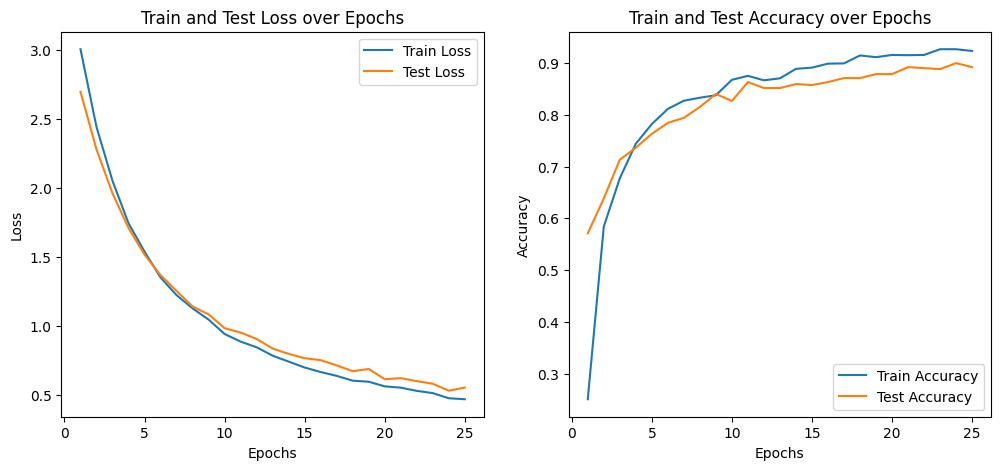

In [25]:
import matplotlib.pyplot as plt

# Plot loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Test Loss over Epochs')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, num_epochs+1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy over Epochs')
plt.legend()

plt.show()

### Confusion Matrix

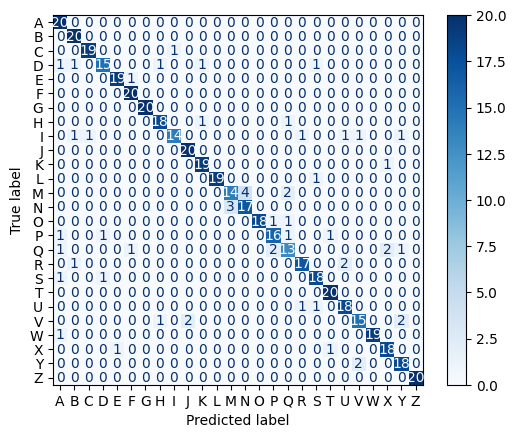

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve

resnet_model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for inputs, labels in test_dataloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = resnet_model(inputs)
        _, preds = torch.max(outputs, 1)
        y_true.extend(labels.cpu().tolist())
        y_pred.extend(preds.cpu().tolist())

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_dict)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score

def calculate_metrics_per_label(model, data_loader, device):
    model.eval()  # Set model ke mode evaluasi
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)  # Forward pass
            _, preds = torch.max(outputs, 1)  # Mendapatkan prediksi kelas
            
            all_preds.extend(preds.cpu().tolist())
            all_labels.extend(labels.cpu().tolist())
    
    # Menghitung Precision, Recall, F1-score untuk setiap label
    precision = precision_score(all_labels, all_preds, average=None)
    recall = recall_score(all_labels, all_preds, average=None)
    f1 = f1_score(all_labels, all_preds, average=None)
    
    return precision, recall, f1


In [28]:
# Asumsikan kamu sudah melatih model dan memiliki test_loader
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
resnet_model.to(device)

# Menghitung metrik
precision, recall, f1 = calculate_metrics_per_label(resnet_model, test_dataloader, device)

# Tampilkan metrik untuk setiap label dengan nama kelas
for i, label in enumerate(class_dict):
    print(f"{label}:")
    print(f"  Precision: {precision[i]:.4f}")
    print(f"  Recall:    {recall[i]:.4f}")
    print(f"  F1-score:  {f1[i]:.4f}")


A:
  Precision: 0.8000
  Recall:    1.0000
  F1-score:  0.8889
B:
  Precision: 0.8696
  Recall:    1.0000
  F1-score:  0.9302
C:
  Precision: 0.9500
  Recall:    0.9500
  F1-score:  0.9500
D:
  Precision: 0.8824
  Recall:    0.7500
  F1-score:  0.8108
E:
  Precision: 0.9500
  Recall:    0.9500
  F1-score:  0.9500
F:
  Precision: 0.9091
  Recall:    1.0000
  F1-score:  0.9524
G:
  Precision: 1.0000
  Recall:    1.0000
  F1-score:  1.0000
H:
  Precision: 0.9000
  Recall:    0.9000
  F1-score:  0.9000
I:
  Precision: 0.9333
  Recall:    0.7000
  F1-score:  0.8000
J:
  Precision: 0.9091
  Recall:    1.0000
  F1-score:  0.9524
K:
  Precision: 0.9048
  Recall:    0.9500
  F1-score:  0.9268
L:
  Precision: 1.0000
  Recall:    0.9500
  F1-score:  0.9744
M:
  Precision: 0.8235
  Recall:    0.7000
  F1-score:  0.7568
N:
  Precision: 0.8095
  Recall:    0.8500
  F1-score:  0.8293
O:
  Precision: 1.0000
  Recall:    0.9000
  F1-score:  0.9474
P:
  Precision: 0.8421
  Recall:    0.8000
  F1-score: 

# Vision Transformer

## Build dan Training Model (ViT)

In [29]:
# Memuat model ViT pre-trained
vit_model = models.vit_b_32(weights='DEFAULT')

# Freeze semua parameter di semua layer kecuali layer terakhir
for param in vit_model.parameters():
    param.requires_grad = False
    
num_classes = 26
vit_model.heads = nn.Sequential(
    nn.Dropout(p=0.3),  # Add dropout layer with 30% probability
    nn.Linear(in_features = 768, out_features=num_classes)
)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
vit_model=vit_model.to(device)

Downloading: "https://download.pytorch.org/models/vit_b_32-d86f8d99.pth" to /root/.cache/torch/hub/checkpoints/vit_b_32-d86f8d99.pth
100%|██████████| 337M/337M [00:01<00:00, 224MB/s]  


In [30]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(vit_model.parameters(), lr=0.001, weight_decay=1e-4)

In [31]:
import time

train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

num_epochs = 25

overall_start_time = time.time()  # Catat waktu mulai keseluruhan
for epoch in range(num_epochs):
    epoch_start_time = time.time()  # Catat waktu awal epoch
    
    vit_model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_dataloader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = vit_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct_train += (preds == labels).sum().item()
        total_train += labels.size(0)

    train_losses.append(running_loss/len(train_dataloader))
    train_accuracies.append(correct_train/total_train)

    # Evaluate on test set
    vit_model.eval()
    running_loss = 0.0
    correct_test = 0
    total_test = 0

    with torch.no_grad():
        for inputs, labels in test_dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = vit_model(inputs)
            loss = criterion(outputs, labels)

            running_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct_test += (preds == labels).sum().item()
            total_test += labels.size(0)

    test_losses.append(running_loss/len(test_dataloader))
    test_accuracies.append(correct_test/total_test)
    
    epoch_end_time = time.time()  # Catat waktu akhir epoch
    epoch_time = epoch_end_time - epoch_start_time  # Hitung waktu untuk epoch ini

    print(f'Epoch [{epoch + 1}/{num_epochs}] - Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accuracies[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}, Test Accuracy: {test_accuracies[-1]:.4f}, Time: {epoch_time:.2f} seconds')

overall_end_time = time.time()  # Catat waktu akhir keseluruhan
total_training_time = overall_end_time - overall_start_time  # Hitung total waktu training
print(f'Total training time: {total_training_time:.2f} seconds')

Epoch [1/25] - Train Loss: 2.6242, Train Accuracy: 0.3216, Test Loss: 1.9293, Test Accuracy: 0.6096, Time: 34.65 seconds
Epoch [2/25] - Train Loss: 1.5536, Train Accuracy: 0.6745, Test Loss: 1.3699, Test Accuracy: 0.7231, Time: 34.24 seconds
Epoch [3/25] - Train Loss: 1.1057, Train Accuracy: 0.7793, Test Loss: 1.0887, Test Accuracy: 0.7962, Time: 34.29 seconds
Epoch [4/25] - Train Loss: 0.9022, Train Accuracy: 0.8212, Test Loss: 0.9282, Test Accuracy: 0.8212, Time: 34.14 seconds
Epoch [5/25] - Train Loss: 0.7367, Train Accuracy: 0.8500, Test Loss: 0.7992, Test Accuracy: 0.8558, Time: 34.10 seconds
Epoch [6/25] - Train Loss: 0.6637, Train Accuracy: 0.8644, Test Loss: 0.7201, Test Accuracy: 0.8673, Time: 34.23 seconds
Epoch [7/25] - Train Loss: 0.5660, Train Accuracy: 0.8861, Test Loss: 0.6663, Test Accuracy: 0.8538, Time: 33.96 seconds
Epoch [8/25] - Train Loss: 0.5049, Train Accuracy: 0.8957, Test Loss: 0.6158, Test Accuracy: 0.8654, Time: 34.55 seconds
Epoch [9/25] - Train Loss: 0.464

## Arsitektur (ViT)

In [32]:
from torchinfo import summary

summary(model=vit_model,
       input_size=(BATCH_SIZE, 3, 224, 224),
       col_names=["input_size", "output_size", "num_params", "trainable"],
       col_width=20,
       )

Layer (type:depth-idx)                        Input Shape          Output Shape         Param #              Trainable
VisionTransformer                             [32, 3, 224, 224]    [32, 26]             768                  Partial
├─Conv2d: 1-1                                 [32, 3, 224, 224]    [32, 768, 7, 7]      (2,360,064)          False
├─Encoder: 1-2                                [32, 50, 768]        [32, 50, 768]        38,400               False
│    └─Dropout: 2-1                           [32, 50, 768]        [32, 50, 768]        --                   --
│    └─Sequential: 2-2                        [32, 50, 768]        [32, 50, 768]        --                   False
│    │    └─EncoderBlock: 3-1                 [32, 50, 768]        [32, 50, 768]        (7,087,872)          False
│    │    └─EncoderBlock: 3-2                 [32, 50, 768]        [32, 50, 768]        (7,087,872)          False
│    │    └─EncoderBlock: 3-3                 [32, 50, 768]        [32, 50, 7

In [33]:
print(vit_model)

VisionTransformer(
  (conv_proj): Conv2d(3, 768, kernel_size=(32, 32), stride=(32, 32))
  (encoder): Encoder(
    (dropout): Dropout(p=0.0, inplace=False)
    (layers): Sequential(
      (encoder_layer_0): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
        )
        (dropout): Dropout(p=0.0, inplace=False)
        (ln_2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU(approximate='none')
          (2): Dropout(p=0.0, inplace=False)
          (3): Linear(in_features=3072, out_features=768, bias=True)
          (4): Dropout(p=0.0, inplace=False)
        )
      )
      (encoder_layer_1): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_a

In [34]:
torch.save(vit_model, "vit_model.pth")

## Evaluasi (ViT)

### Akurasi

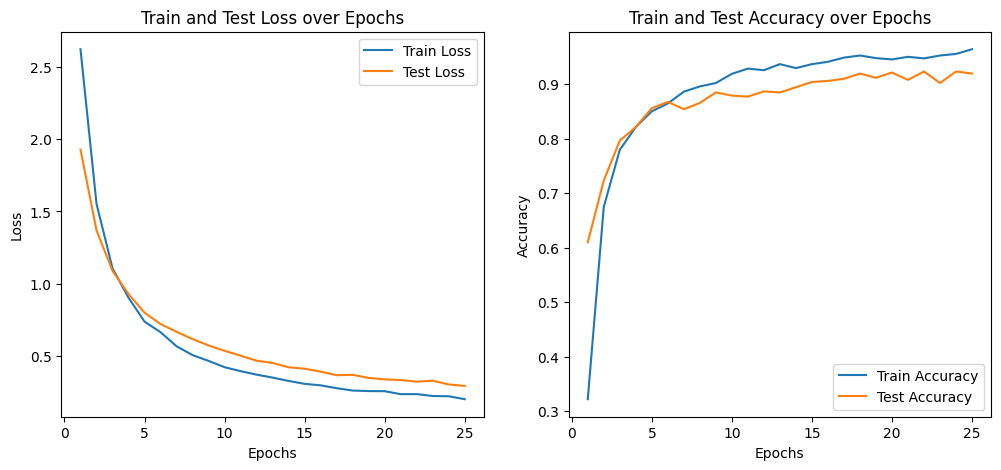

In [35]:
import matplotlib.pyplot as plt

# Plot loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Test Loss over Epochs')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, num_epochs+1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy over Epochs')
plt.legend()

plt.show()

### Confusion Matrix

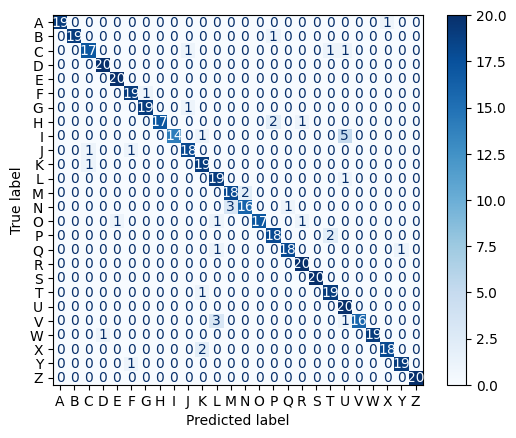

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

resnet_model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for inputs, labels in test_dataloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = vit_model(inputs)
        _, preds = torch.max(outputs, 1)
        y_true.extend(labels.cpu().tolist())
        y_pred.extend(preds.cpu().tolist())

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_dict)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [37]:
from sklearn.metrics import precision_score, recall_score, f1_score

def calculate_metrics_per_label(model, data_loader, device):
    model.eval()  # Set model ke mode evaluasi
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)  # Forward pass
            _, preds = torch.max(outputs, 1)  # Mendapatkan prediksi kelas
            
            all_preds.extend(preds.cpu().tolist())
            all_labels.extend(labels.cpu().tolist())
    
    # Menghitung Precision, Recall, F1-score untuk setiap label
    precision = precision_score(all_labels, all_preds, average=None)
    recall = recall_score(all_labels, all_preds, average=None)
    f1 = f1_score(all_labels, all_preds, average=None)
    
    return precision, recall, f1


In [38]:
# Asumsikan kamu sudah melatih model dan memiliki test_loader
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
resnet_model.to(device)

# Menghitung metrik
precision, recall, f1 = calculate_metrics_per_label(vit_model, test_dataloader, device)

# Tampilkan metrik untuk setiap label dengan nama kelas
for i, label in enumerate(class_dict):
    print(f"{label}:")
    print(f"  Precision: {precision[i]:.4f}")
    print(f"  Recall:    {recall[i]:.4f}")
    print(f"  F1-score:  {f1[i]:.4f}")


A:
  Precision: 1.0000
  Recall:    0.9500
  F1-score:  0.9744
B:
  Precision: 1.0000
  Recall:    0.9500
  F1-score:  0.9744
C:
  Precision: 0.8947
  Recall:    0.8500
  F1-score:  0.8718
D:
  Precision: 0.9524
  Recall:    1.0000
  F1-score:  0.9756
E:
  Precision: 0.9524
  Recall:    1.0000
  F1-score:  0.9756
F:
  Precision: 0.9048
  Recall:    0.9500
  F1-score:  0.9268
G:
  Precision: 0.9500
  Recall:    0.9500
  F1-score:  0.9500
H:
  Precision: 1.0000
  Recall:    0.8500
  F1-score:  0.9189
I:
  Precision: 1.0000
  Recall:    0.7000
  F1-score:  0.8235
J:
  Precision: 0.9000
  Recall:    0.9000
  F1-score:  0.9000
K:
  Precision: 0.8261
  Recall:    0.9500
  F1-score:  0.8837
L:
  Precision: 0.7917
  Recall:    0.9500
  F1-score:  0.8636
M:
  Precision: 0.8571
  Recall:    0.9000
  F1-score:  0.8780
N:
  Precision: 0.8889
  Recall:    0.8000
  F1-score:  0.8421
O:
  Precision: 1.0000
  Recall:    0.8500
  F1-score:  0.9189
P:
  Precision: 0.8571
  Recall:    0.9000
  F1-score: 